# Predicting Breast Cancer in a patient

Abstract: Breast cancer represents one of the diseases that make a high number of deaths every year. 
         It is the most common type of all cancers and the main cause of women's deaths worldwide. 
         Classification and data mining methods are an effective way to classify data. 
         Especially in the maedical field, where those methods are widely used in diagnosis and analysis to make decisions.

In [2]:
# importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

● Analysing the available data and exploring relationships among given variables ● 

In [3]:
# importing the data:
pbc = pd.read_csv(r"C:\Users\DONMETHIL\Downloads\Xudemy\cancerdata.csv")

In [4]:
pbc.head() # listing the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
pbc.columns # listing the columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
pbc.shape # 569 rows and 33 columns

(569, 33)

In [7]:
pbc.info() # show the datatypes and null/non-null entries in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
pbc.isnull().sum() # show the column with no values(null values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
pbc.describe() # show the count, mean, median, mode and percentile

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


● Data Pre-processing ●

In [10]:
# Our Target Column is the "diagnosis" and remaining columns are the dependent variables.
pbc.shape 

(569, 33)

In [11]:
# Among all the columns "Unnamed: 32" & "id" are not necessary as they are null and invalid columns.
pbc.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [12]:
pbc.shape

(569, 31)

In [13]:
pbc['diagnosis'].unique() # finding the Unique values in the column "diagnosis"

array(['M', 'B'], dtype=object)

In [14]:
pbc['diagnosis'].value_counts()
#There are 357-'Benign' and 212-'Malignant'cases in patients

B    357
M    212
Name: diagnosis, dtype: int64

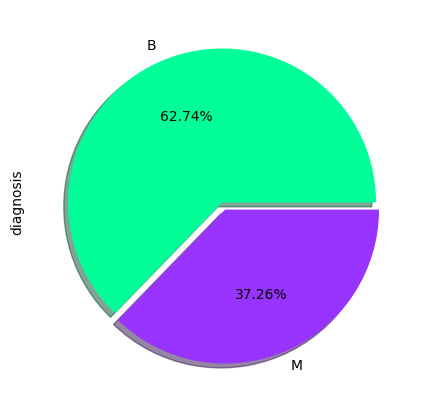

In [15]:
pbc['diagnosis'].value_counts().plot(kind = 'pie', 
                                    autopct = '%0.2f%%', 
                                    figsize = [5,5], 
                                    explode = [0,0.05], 
                                    colors = ['#00ff99', '#9933ff'], 
                                    shadow = True)

plt.show()

In [16]:
# As the Target values are in categorical form, lets label encode the vales to numerical data

label_encode = LabelEncoder() # initialising the LabelEncoder

labels = label_encode.fit_transform(pbc['diagnosis']) #Transforming the Categorical to Numerical data

pbc['t_diagnosis'] = labels # Creating a new column


In [17]:
pbc['t_diagnosis'].value_counts()
# B - 357
# M - 212

0    357
1    212
Name: t_diagnosis, dtype: int64

In [18]:
pbc['t_diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: t_diagnosis, dtype: int32

In [19]:
# deleting the "diagnosis" from the data set.
pbc.drop(columns='diagnosis', axis=1, inplace=True)

In [20]:
pbc.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 't_diagnosis'],
      dtype='object')

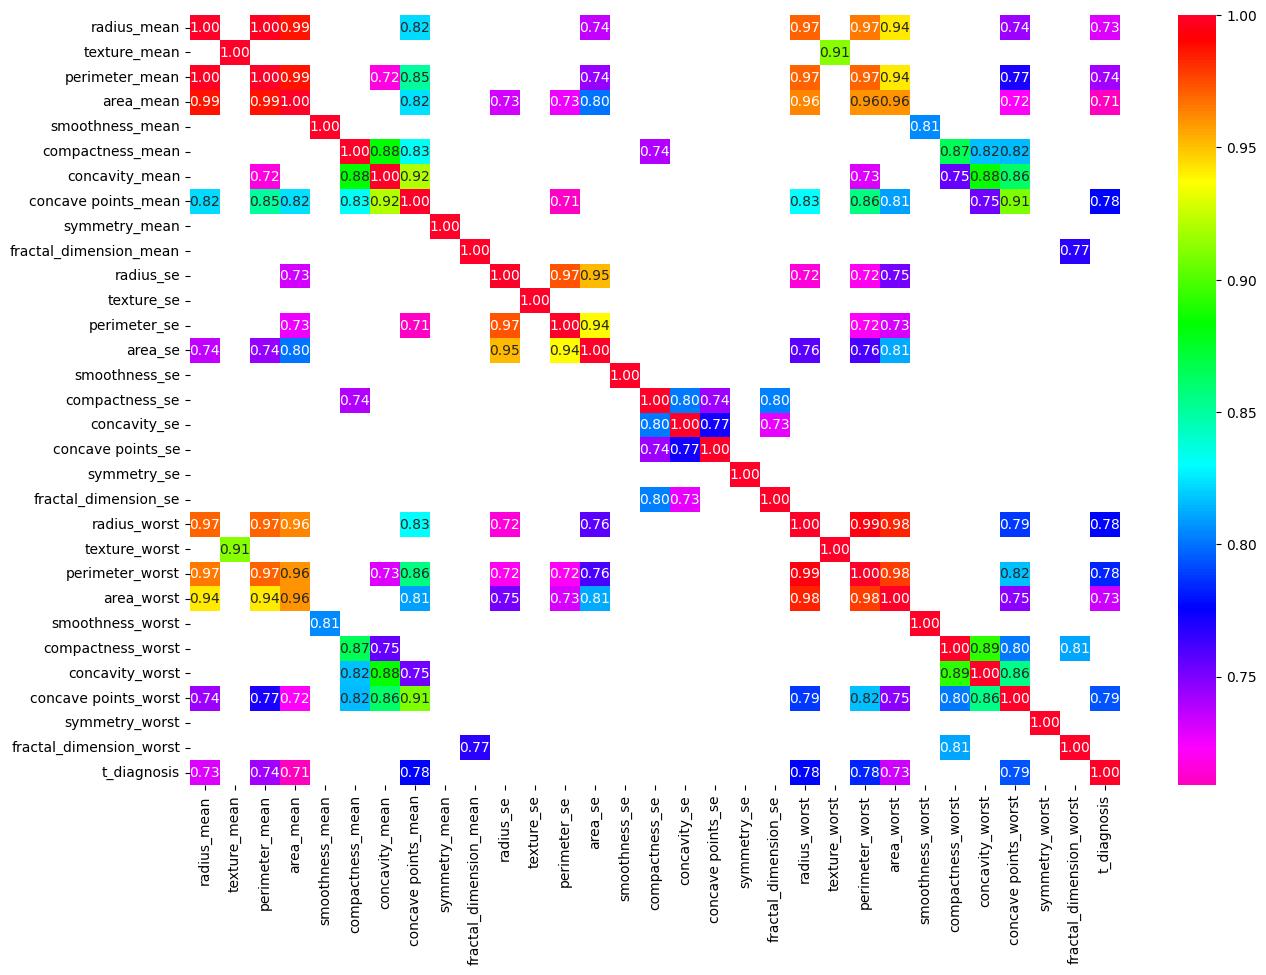

In [21]:
corr = pbc.corr() # Checking for Correlation

kot = corr[corr>=.7]

plt.figure(figsize = [15,10])

sns.heatmap(kot, annot = True, cmap = 'gist_rainbow_r', fmt = '0.2f')

plt.show()

● Training SVM classifier to predict whether the patient has cancer or not ●

In [22]:
# Train Test Split

X = pbc.drop(columns='t_diagnosis', axis=1)
Y = pbc['t_diagnosis']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=3)

print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [24]:
# from sklearn.metrics import accuracy_score 
# from sklearn.svm import SVC 

model = SVC(kernel='linear') # Defining the Model to be Trained
model.fit(X_train, Y_train) 

test_data_prediction = model.predict(X_test) # Predicting

accuracy = accuracy_score(Y_test, test_data_prediction) # Model Accuracy

print('Accuracy score of the ', model, ' = ', accuracy) 

Accuracy score of the  SVC(kernel='linear')  =  0.9824561403508771


In [25]:
# B - 357 - 0
# M - 212 - 1
# sample inputs
inp0 = (11.51,23.93,74.52,403.5,0.09261,0.1021,0.1112,0.04105,0.1388,0.0657,0.2388,2.904,1.936,16.97,0.0082,0.02982,0.05738,0.01267,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.363,0.09653,0.2112,0.08732)

inp1 = (7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039)

inp2 = (20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124)

In [26]:
# SVM classifier to predict whether the patient has cancer or not:
# let take inp1 as patient 01 and inp2 as patient 02.


inp1 = (7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039)
#
inp2 = (20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(inp2)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Benign')

else:
  print('The Breast Cancer is Malignant')


[1]
The Breast Cancer is Malignant


C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
"FRORM THE ABOVE IT IS CLEAR THAT PATIENT 02 HAS Malignant AND PATIENT 01 HAS BENING"

● Assess the correctness in classifying data with respect to efficiency and effectiveness of ●
● the SVM classifier in terms of accuracy, precision, sensitivity, specificity and AUC ROC ●

In [27]:
# Accuracy Score for Training Data:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)
#
# 0.9604395604395605 - Accuracy Score


0.9604395604395605


In [28]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  96.04 %


In [29]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.9824561403508771


In [30]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  98.25 %


In [31]:
# Confuaion Matrix:

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[71  1]
 [ 1 41]]


In [32]:
# to reveal the TP,TN,FN,FP

tn, fp, fn, tp = cf_matrix.ravel() 

print(tn, fp, fn, tp)

71 1 1 41


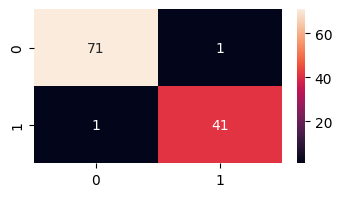

In [33]:
# Plotting Confuaion Matrix on Heat map for better understanding:

plt.figure(figsize = [4,2])
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [35]:
# Deriving Precision, Recall, F1 Scores:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)
    
#

In [36]:
# classification metrics for training data

precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9578313253012049
Recall = 0.9352941176470588
F1 Score = 0.9464285714285714


In [37]:
# classification metrics for test data

precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9761904761904762
Recall = 0.9761904761904762
F1 Score = 0.9761904761904762


In [38]:
# Comparing the Time Efficiency score of test and train.

import time

st = time.time()

model1 = SVC(kernel="rbf", degree=1,gamma=0.001, C=100, probability=True)

model1.fit(X_train, Y_train)

print("Train score :", model1.score(X_train, Y_train))
print("Test score :", model1.score(X_test, Y_test))

et = time.time()
print("Time Taken", et-st, "sec")

# -------------------------------------------------------------- #


Train score : 1.0
Test score : 0.8947368421052632
Time Taken 0.3599357604980469 sec


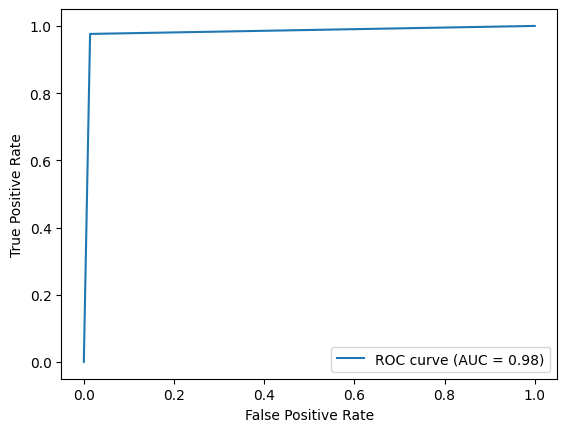

In [39]:
# AUC - ROC Curve:

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

#model.fit(X_train, Y_train, probability=True)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Rank-Based AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

auc = roc_auc_score(Y_test, y_pred)

# Plot the ROC curve

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()




● Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library ●

In [ ]:
# X = pbc.drop(columns='t_diagnosis', axis=1)
# Y = pbc['t_diagnosis']

In [40]:
X = np.asarray(X)
    
Y = np.asarray(Y)

In [42]:
# loading the SVC model
from sklearn.model_selection import GridSearchCV
model = SVC()

In [43]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
                }

classifier = GridSearchCV(model, parameters, cv=5)

classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [44]:
classifier.cv_results_

{'mean_fit_time': array([4.24414840e+00, 9.37652588e-03, 1.24998569e-02, 3.43750954e-02,
        1.16902466e+01, 1.56274796e-02, 1.56261444e-02, 3.12501431e-02,
        7.81864710e+00, 1.25013828e-02, 1.59481049e-02, 3.14960003e-02,
        1.33210707e+01, 9.37561989e-03, 1.25009537e-02, 3.00388336e-02]),
 'std_fit_time': array([8.92827449e-01, 7.65590146e-03, 6.24992921e-03, 6.25221751e-03,
        3.40312633e+00, 3.78657946e-06, 3.02105600e-06, 4.23177867e-06,
        1.13540693e+00, 6.25069170e-03, 6.45017844e-04, 1.40094601e-03,
        2.52206509e+00, 7.65516183e-03, 6.25047729e-03, 3.55675030e-03]),
 'mean_score_time': array([0.00625119, 0.00312519, 0.00312533, 0.00625067, 0.00114961,
        0.        , 0.00625019, 0.00937543, 0.        , 0.00625057,
        0.00512624, 0.00785184, 0.00039973, 0.00625033, 0.00624948,
        0.00785289]),
 'std_score_time': array([0.00765612, 0.00625038, 0.00625067, 0.00765547, 0.00141019,
        0.        , 0.00765489, 0.00765501, 0.        , 

In [45]:
# Best Parameters:

best_parameters = classifier.best_params_
print(best_parameters)
# {'C': 5, 'kernel': 'linear'}

{'C': 5, 'kernel': 'linear'}


In [46]:
# Highest Accuracy:

highest_accuracy = classifier.best_score_
print(highest_accuracy)
# 0.952585002328831

0.952585002328831


In [ ]:
# -------------------------------------------------------------------------- #

In [ ]:
# -------------------------------------------------------------------------- #

In [ ]:
# ---------------------------------Bagging Classifier----------------------------------------- #

In [50]:
# Bagging Classifier : 
from sklearn.ensemble import BaggingClassifier
# 
param_b = {'n_estimators':[150,200,250,300],
              'bootstrap': [True, False],
              'max_features': [1,2,3,5,10],
              'max_samples' : [15,20,25,30]}

fit_bagging = BaggingClassifier(random_state = 1)

cv_bagging = GridSearchCV(fit_bagging, cv = 5, param_grid= param_b, n_jobs = -1, verbose = 1)

cv_bagging.fit(X_train, Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [51]:
cv_bagging.best_params_

{'bootstrap': True, 'max_features': 5, 'max_samples': 30, 'n_estimators': 200}

In [53]:
#
bagging = BaggingClassifier(n_estimators=200,max_samples=25, max_features=10, bootstrap=True, random_state=1)

bagging.fit(X_train, Y_train)
#
print('Train_accuracy', bagging.score(X_train, Y_train))
print('Test_accuracy', bagging.score(X_test, Y_test))

Train_accuracy 0.9582417582417583
Test_accuracy 0.9649122807017544


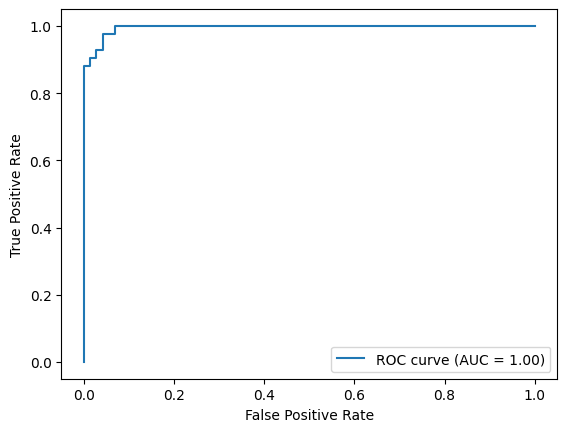

In [54]:
# Model Evaluation:

from sklearn.metrics import roc_curve, roc_auc_score
#
y_pred_proba = bagging.predict_proba(X_test)[::,1]
#
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
#
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

In [58]:
from sklearn import metrics

In [62]:
#
from sklearn.metrics import roc_curve, roc_auc_score
model_report = []
#
test_pred_bag = bagging.predict(X_test)

MD = pd.Series({'Model': "Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(Y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(Y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(Y_test, test_pred_bag),
                 'F1 Score' : metrics.f1_score(Y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(Y_test, test_pred_bag)})
#

In [63]:
MD

Model              Bagging Classifier 
ROC Score                     0.967262
Precision Score               0.931818
Recall Score                   0.97619
F1 Score                      0.953488
Accuracy Score                0.964912
dtype: object

In [ ]:
# ---------------------------------Adaboost Classifier----------------------------------------- #

In [65]:
# Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
#
param_ada  =  {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}

fit_adaboost = AdaBoostClassifier(random_state = 1)

cv_adaboost = GridSearchCV(fit_adaboost, cv = 5, param_grid= param_ada, n_jobs = -1, verbose = 1)

cv_adaboost.fit(X_test, Y_test)
#

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [66]:
cv_adaboost.best_params_

{'learning_rate': 0.7, 'n_estimators': 50}

In [67]:
#
ABC = AdaBoostClassifier(n_estimators=150,learning_rate=1.5,random_state=1)
ABC.fit(X_test, Y_test)
#
print('Train_accuracy', ABC.score(X_train, Y_train))
print('Test_accuracy', ABC.score(X_test, Y_test))
#

Train_accuracy 0.9648351648351648
Test_accuracy 1.0


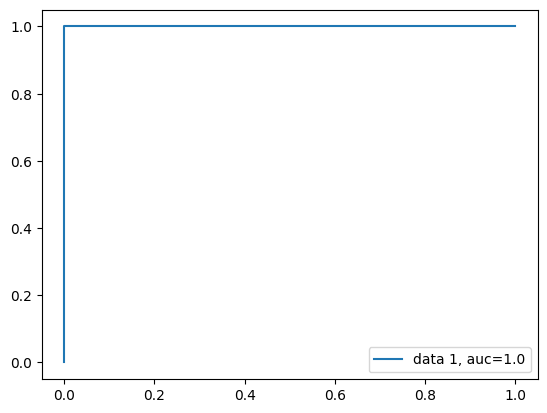

In [68]:
#
y_pred_proba = ABC.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc = metrics.roc_auc_score(Y_test, y_pred_proba)
#
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
#
plt.show()

In [70]:
#
test_pred_ABC = ABC.predict(X_test)

MD2 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(Y_test, test_pred_ABC),
                 'Precision Score': metrics.precision_score(Y_test, test_pred_ABC),
                 'Recall Score': metrics.recall_score(Y_test, test_pred_ABC),
                 'F1 Score' : metrics.f1_score(Y_test, test_pred_ABC),
                 'Accuracy Score': metrics.accuracy_score(Y_test, test_pred_ABC)})
#
MD2
#

Model               Adaboost Classifier 
ROC Score                            1.0
Precision Score                      1.0
Recall Score                         1.0
F1 Score                             1.0
Accuracy Score                       1.0
dtype: object

In [ ]:
# -------------------------------------------------------------------------- #

In [ ]:
# -------------------------------------------------------------------------- #

In [ ]:
# Scope:
    
● # Analysing the available data and exploring relationships among given variables
● # Data Pre-processing
● # Training SVM classifier to predict whether the patient has cancer or not
● # Assess the correctness in classifying data with respect to efficiency and effectiveness of
  # the SVM classifier in terms of accuracy, precision, sensitivity, specificity and AUC ROC
● # Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library
